# Project: Wrangling and Analyze Data

### Project Overview

#### Introduction

Real-world data rarely comes clean. Using Python and its libraries, in this project, I have gathered data from a variety of sources and in a variety of formats, assessed its quality and tidiness, then cleaned it. This is called data wrangling. I have documented my wrangling efforts in this Jupyter Notebook, as well as showcased them through analyses and visualizations using Python (and its libraries).

The dataset used in the wrangling (and analyses and visualizations) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for us to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017.


#### Motivation

My goal in this project is to wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations.

#### The Data

The following three datasets will be used in this study.

- **Enhanced Twitter Archive:** This includes basic tweet data for all of their 5000+ tweets, but not all of it. I wanted to utilize this file, so I downloaded it.

- **Additional Data via the Twitter API:** Returning to the Twitter archives, retweet count and favorite count are two notable column exclusions. Using the tweet IDs from the WeRateDogs Twitter archive, I'd use Python's Tweepy package to query the Twitter API for each tweet's JSON data, then save each tweet's whole set of JSON data in a file named tweet_json.txt. The .txt file is read into a pandas DataFrame

- **Image Predictions File:** The tweet image predictions includes a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images)

### Project Steps Overview

My tasks in this project are as follows:

Step 1: Gathering data

Step 2: Assessing data

Step 3: Cleaning data

Step 4: Storing data

Step 5: Analyzing and visualizing data

Step 6: Reporting

### Import the required packages

In [1]:
import requests
import os
import pandas as pd
import numpy as np
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image 
from io import BytesIO

## Step 1: Gathering data
In the cells below, I have gathered **all** three pieces of data for this project and loaded them in the notebook. **Note:** the methods required to gather each data are different.

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
#I have directly downloaded the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv) as provided by Udacity and read the data into a pandas DataFrame.

twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#I have used the Requests library to download the tweet image prediction (image_predictions.tsv)

#If a directory does not already exist, create one.
folder = 'image_predictions'
if not os.path.exists(folder):
    os.makedirs(folder)

In [5]:
#Using the Requests library, we will get the tweet image predictions TSV and save it as image_predictions.tsv.

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

#create a file
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)
    
#Import the TSV file with tweet image predictions into a DataFrame.
image_prediction = pd.read_csv('image_predictions.tsv', sep='\t')
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Explaining the code above: 
- Requesting a file from a cloud storage service.
- The response from the service is stored in a variable `response`.
- Next is to open a text file called "image_predictions.tsv" in write mode.
- Then write the response content to the file.
- Read  the csv called "image_predictions.tsv" and separates the data by tabs.
- Lastly show the first five rows of the data.

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
# We will use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)
# Here, I will apply my Twitter API key and API secret codes in order to access the Twitter API
my_api_key = "*************************"
my_api_secret = "************************"
# authenticate
auth = tweepy.OAuthHandler(my_api_key, my_api_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [7]:
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

2356

I'm going to use the Tweepy library to query each tweet's retweet and favorite ("like") count and save the results in tweet json.txt, but first I'm going to query Twitter's API for JSON data for each tweet ID in the Twitter archive.


In [8]:
#Understanding how to use Python – API.get_status() in Tweepy

ID = 1256931752171515904
# obtaining the status
status = api.get_status(ID)
  
# printing the text of the status
print("The text of the status is : \n\n" + status.text)
  
# printing the screen name
print("\nThe status was posted by : " + status.user.screen_name)
  
# printing the number of likes
print("The status has been liked " + str(status.favorite_count) + " number of times.")
  
# printing the number of retweets
print("The status has been retweeted " + str(status.retweet_count) + " number of times.")

# the amount of people who follow the person who tweeted
print("The number of followers of the user is " + str(status.user.followers_count))
      
# the number of favorites for the tweeter
print("The number of favourites for the user who tweeted is " + str(status.user.favourites_count))

# the timestamp, or the date and time when the tweet was created
print("the timestamp of when the tweet was created is " + str(status.created_at))

The text of the status is : 

Stella Obasanjo. https://t.co/iQaCLpp8Uu

The status was posted by : ikev007
The status has been liked 23586 number of times.
The status has been retweeted 4805 number of times.
The number of followers of the user is 4569
The number of favourites for the user who tweeted is 12653
the timestamp of when the tweet was created is 2020-05-03 13:00:57+00:00


In [9]:
#making a list for exceptions/errors in tweets
tweet_errors = []

# List of tweets
tweets = []

# start time of execution
start = timer()

# For loop which will add each available tweet json to tweets
for tweet_id in tweet_ids:
    try:
        tweet = api.get_status(tweet_id, tweet_mode= 'extended')._json
        
        favorites = tweet['favorite_count'] #the number of people who liked the tweet
        retweets = tweet['retweet_count'] # the total number of retweets 
        user_followers = tweet['user']['followers_count'] # the amount of people who follow the person who tweeted
        user_favourites = tweet['user']['favourites_count'] # the number of favorites for the tweeter
        date_time = tweet['created_at'] # the timestamp, or the date and time when the tweet was created
        
        tweets.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                        'user_followers': int(user_followers),
                        'user_favourites': int(user_favourites),
                        'date_time': pd.to_datetime(date_time)})
    except Exception as e:
        print(str(tweet_id)+" has"+" Failed")
        tweet_errors.append(tweet_id)
        
# end time for excution
end = timer()

#printing time for execution
print("Total time taken for execution", end - start)

891087950875897856 has Failed
889278841981685760 has Failed
888202515573088257 has Failed
887517139158093824 has Failed
887343217045368832 has Failed
886983233522544640 has Failed
886054160059072513 has Failed
885528943205470208 has Failed
884162670584377345 has Failed
883838122936631299 has Failed
882992080364220416 has Failed
875097192612077568 has Failed
873697596434513921 has Failed
872668790621863937 has Failed
872261713294495745 has Failed
869988702071779329 has Failed
866816280283807744 has Failed
861769973181624320 has Failed
861005113778896900 has Failed
856602993587888130 has Failed
856330835276025856 has Failed
851953902622658560 has Failed
851861385021730816 has Failed
845459076796616705 has Failed
844704788403113984 has Failed
842892208864923648 has Failed
837366284874571778 has Failed
837012587749474308 has Failed
829374341691346946 has Failed
827228250799742977 has Failed
812747805718642688 has Failed
802247111496568832 has Failed
787111942498508800 has Failed
7869630643

751132876104687617 has Failed
750868782890057730 has Failed
750719632563142656 has Failed
750506206503038976 has Failed
750429297815552001 has Failed
750383411068534784 has Failed
750381685133418496 has Failed
750147208377409536 has Failed
750132105863102464 has Failed
750117059602808832 has Failed
750101899009982464 has Failed
750086836815486976 has Failed
750071704093859840 has Failed
750056684286914561 has Failed
750041628174217216 has Failed
750026558547456000 has Failed
750011400160841729 has Failed
749996283729883136 has Failed
749981277374128128 has Failed
749774190421639168 has Failed
749417653287129088 has Failed
749403093750648834 has Failed
749395845976588288 has Failed
749317047558017024 has Failed
749075273010798592 has Failed
749064354620928000 has Failed
749036806121881602 has Failed
748977405889503236 has Failed
748932637671223296 has Failed
748705597323898880 has Failed
748699167502000129 has Failed
748692773788876800 has Failed
748575535303884801 has Failed
7485689467

712438159032893441 has Failed
712309440758808576 has Failed
712097430750289920 has Failed
712092745624633345 has Failed
712085617388212225 has Failed
712065007010385924 has Failed
711998809858043904 has Failed
711968124745228288 has Failed
711743778164514816 has Failed
711732680602345472 has Failed
711694788429553666 has Failed
711652651650457602 has Failed
711363825979756544 has Failed
711306686208872448 has Failed
711008018775851008 has Failed
710997087345876993 has Failed
710844581445812225 has Failed
710833117892898816 has Failed
710658690886586372 has Failed
710609963652087808 has Failed
710588934686908417 has Failed
710296729921429505 has Failed
710283270106132480 has Failed
710272297844797440 has Failed
710269109699739648 has Failed
710153181850935296 has Failed
710140971284037632 has Failed
710117014656950272 has Failed
709918798883774466 has Failed
709901256215666688 has Failed
709852847387627521 has Failed
709566166965075968 has Failed
709556954897764353 has Failed
7095192405

691321916024623104 has Failed
691096613310316544 has Failed
691090071332753408 has Failed
690989312272396288 has Failed
690959652130045952 has Failed
690938899477221376 has Failed
690932576555528194 has Failed
690735892932222976 has Failed
690728923253055490 has Failed
690690673629138944 has Failed
690649993829576704 has Failed
690607260360429569 has Failed
690597161306841088 has Failed
690400367696297985 has Failed
690374419777196032 has Failed
690360449368465409 has Failed
690348396616552449 has Failed
690248561355657216 has Failed
690021994562220032 has Failed
690015576308211712 has Failed
690005060500217858 has Failed
689999384604450816 has Failed
689993469801164801 has Failed
689977555533848577 has Failed
689905486972461056 has Failed
689877686181715968 has Failed
689835978131935233 has Failed
689661964914655233 has Failed
689659372465688576 has Failed
689623661272240129 has Failed
689599056876867584 has Failed
689557536375177216 has Failed
689517482558820352 has Failed
6892892191

676582956622721024 has Failed
676575501977128964 has Failed
676533798876651520 has Failed
676496375194980353 has Failed
676470639084101634 has Failed
676440007570247681 has Failed
676430933382295552 has Failed
676263575653122048 has Failed
676237365392908289 has Failed
676219687039057920 has Failed
676215927814406144 has Failed
676191832485810177 has Failed
676146341966438401 has Failed
676121918416756736 has Failed
676101918813499392 has Failed
676098748976615425 has Failed
676089483918516224 has Failed
675898130735476737 has Failed
675891555769696257 has Failed
675888385639251968 has Failed
675878199931371520 has Failed
675870721063669760 has Failed
675853064436391936 has Failed
675849018447167488 has Failed
675845657354215424 has Failed
675822767435051008 has Failed
675820929667219457 has Failed
675798442703122432 has Failed
675781562965868544 has Failed
675740360753160193 has Failed
675710890956750848 has Failed
675707330206547968 has Failed
675706639471788032 has Failed
6755344944

670442337873600512 has Failed
670435821946826752 has Failed
670434127938719744 has Failed
670433248821026816 has Failed
670428280563085312 has Failed
670427002554466305 has Failed
670421925039075328 has Failed
670420569653809152 has Failed
670417414769758208 has Failed
670411370698022913 has Failed
670408998013820928 has Failed
670403879788544000 has Failed
670385711116361728 has Failed
670374371102445568 has Failed
670361874861563904 has Failed
670338931251150849 has Failed
670319130621435904 has Failed
670303360680108032 has Failed
670290420111441920 has Failed
670093938074779648 has Failed
670086499208155136 has Failed
670079681849372674 has Failed
670073503555706880 has Failed
670069087419133954 has Failed
670061506722140161 has Failed
670055038660800512 has Failed
670046952931721218 has Failed
670040295598354432 has Failed
670037189829525505 has Failed
670003130994700288 has Failed
669993076832759809 has Failed
669972011175813120 has Failed
669970042633789440 has Failed
6699427637

### Explaining the code above

1. The code is iterating through a list of tweet ids.

2. For each tweet id, it tries to get the tweet from the Twitter API.

3. If the tweet is successfully retrieved, the code calculates the number of favorites and retweets, user_followers, user favourites and date_time for the tweet.

4. The code then appends a new row to the tweets list, with all the calculated values while also implementing the correct datatype.

5. If there is an exception while retrieving the tweet, the code logs the exception and adds the tweet id to a list.

In [10]:
print(len(tweets))

660


I'm generating a DataFrame with the following columns from the tweets:

- user followers 
- user favourites 
- date time 
- tweet id 
- favorites 
- retweets

Next is to save the DataFrame to the 'tweet_json.txt' file.

In [11]:
tweets_json = pd.DataFrame(tweets, columns = ['tweet_id', 'favorites', 'retweets',
                                               'user_followers', 'user_favourites', 'date_time'])

In [12]:
tweets_json.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [13]:
df_api = pd.read_csv('tweet_json.txt', encoding = 'utf-8')
df_api.head()

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,33792,6998,9300854,146892,2017-08-01 16:23:56+00:00
1,892177421306343426,29312,5297,9300854,146892,2017-08-01 00:17:27+00:00
2,891815181378084864,22041,3477,9300854,146892,2017-07-31 00:18:03+00:00
3,891689557279858688,36915,7219,9300854,146892,2017-07-30 15:58:51+00:00
4,891327558926688256,35294,7752,9300854,146892,2017-07-29 16:00:24+00:00


### Explaining the code

- The code creates a dataframe from the tweets JSON file.
- The code sets the columns of the dataframe to the tweet_id, favorites, retweets, user_followers, user_favorites, and date_time fields in the JSON file.
- The .to_csv() function is used to write the data in our 'tweets_json' variable to a .csv file called 'tweet_json.txt'.
- Then it's  specified that the .csv file should be encoded in 'utf-8' and that the index should be False (which will prevent the creation of a header row in the .csv file).

## Step 2: Assessing data
In this section, I will detect and document at least **eight (8) quality issues and two (2) tidiness issue**. I will use **both** visual assessment
programmatic assessement to assess the data.

**Note:** Some key points to pay attention to when accessing the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.


### Displaying each table

- I'll be displaying the first five rows  and the last five rows and also a sample of the data to visually inspect the data

### Visual assessment

In [14]:
# Check the first five rows
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [15]:
#Check the last five rows
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [16]:
#The sample() function is used to get a random sample of items from an axis of object.
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1531,690015576308211712,NaN,NaN,2016-01-21 03:38:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper can only sleep on shoes. It's a cr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690015576...,12,10,None,None,None,pupper,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
1071,740214038584557568,NaN,NaN,2016-06-07 16:09:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is getting incredibly frustrating. This i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/740214038...,10,10,getting,None,None,None,None
248,845397057150107648,NaN,NaN,2017-03-24 22:08:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Mimosa. She's an emotional suppor...,NaN,NaN,NaN,"https://www.gofundme.com/help-save-a-pup,https...",13,10,Mimosa,doggo,None,None,None
457,818145370475810820,NaN,NaN,2017-01-08 17:20:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Autumn. Her favorite toy is a cheesebu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/818145370...,11,10,Autumn,None,None,None,None


> ### twitter_archive table
>
>  Inspecting the data visually, I can see that:

> 1. The following columns mostly contained **null datasets**.
>  - in_reply_to_status_id, 
>  - in_reply_to_user_id,
>  - retweeted_status_id
>  - retweeted_status_user_id 
>  - retweeted_status_timestamp 
>  
>
> 2. The timestamp contained both time and date, that should be looked into.
>
> 3. Several rows from the tail() output include incorrect strings in the name column, such as "a," "an," and "in," which are the third word in the text column.  Also values of "None" in the name column.
>
> 3. doggo, floofer, pupper, puppo had many values reepresented as "none"

In [17]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [18]:
image_prediction.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [19]:
image_prediction.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
722,686003207160610816,https://pbs.twimg.com/media/CYUsRsbWAAAUt4Y.jpg,1,damselfly,0.190786,False,common_newt,0.098131,False,whiptail,0.088958,False
823,693155686491000832,https://pbs.twimg.com/media/CZ6VatdWwAAwHly.jpg,3,Shih-Tzu,0.697480,True,Lhasa,0.200151,True,Tibetan_terrier,0.090970,True
382,673320132811366400,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True
931,703079050210877440,https://pbs.twimg.com/media/CcHWqQCW8AEb0ZH.jpg,2,Pembroke,0.778503,True,Shetland_sheepdog,0.093834,True,Cardigan,0.060296,True
68,667182792070062081,https://pbs.twimg.com/media/CUJPNjOWsAAZRqP.jpg,1,golden_retriever,0.949892,True,Irish_setter,0.010564,True,Chesapeake_Bay_retriever,0.005821,True


> ### image_prediction
>   Inspecting the data visually, I can see that:
> - The naming of the dogs were non-uniform; some were written in capitals, while some were in small letters
> - Also we can remove the underscore for many dog breed names
> - I don't think there's need for the jpg url 
> - The columns "p1" and "p1 conf" should have descriptive names.

In [20]:
df_api.head()

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,33792,6998,9300854,146892,2017-08-01 16:23:56+00:00
1,892177421306343426,29312,5297,9300854,146892,2017-08-01 00:17:27+00:00
2,891815181378084864,22041,3477,9300854,146892,2017-07-31 00:18:03+00:00
3,891689557279858688,36915,7219,9300854,146892,2017-07-30 15:58:51+00:00
4,891327558926688256,35294,7752,9300854,146892,2017-07-29 16:00:24+00:00


In [21]:
df_api.tail()

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
655,788039637453406209,5797,1227,9300906,146892,2016-10-17 15:31:05+00:00
656,787810552592695296,8151,2840,9300906,146892,2016-10-17 00:20:47+00:00
657,787717603741622272,9707,2586,9300906,146892,2016-10-16 18:11:26+00:00
658,787397959788929025,10331,2668,9300906,146892,2016-10-15 21:01:17+00:00
659,787322443945877504,7393,1626,9300906,146892,2016-10-15 16:01:13+00:00


In [22]:
df_api.sample(5)

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
189,852189679701164033,10573,1419,9300884,146892,2017-04-12 16:00:27+00:00
415,819227688460238848,21789,6238,9300895,146892,2017-01-11 17:01:16+00:00
456,814530161257443328,8214,1739,9300896,146892,2016-12-29 17:54:58+00:00
330,830097400375152640,9169,2698,9300893,146892,2017-02-10 16:53:37+00:00
126,864197398364647424,26626,7582,9300877,146892,2017-05-15 19:14:50+00:00


### Programmatic assessment

#### Twitter archive

In [23]:
twitter_archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [24]:
twitter_archive.describe().T

,count,mean,std,min,25%,50%,75%,max
tweet_id,2356.0,7.427716e+17,6.856705e+16,6.660209e+17,6.783989e+17,7.196279e+17,7.993373e+17,8.924206e+17
in_reply_to_status_id,78.0,7.455079e+17,7.582492e+16,6.658147e+17,6.757419e+17,7.038708e+17,8.257804e+17,8.862664e+17
in_reply_to_user_id,78.0,2.014171e+16,1.252797e+17,1.185634e+07,3.086374e+08,4.196984e+09,4.196984e+09,8.405479e+17
retweeted_status_id,181.0,7.720400e+17,6.236928e+16,6.661041e+17,7.186315e+17,7.804657e+17,8.203146e+17,8.874740e+17
retweeted_status_user_id,181.0,1.241698e+16,9.599254e+16,7.832140e+05,4.196984e+09,4.196984e+09,4.196984e+09,7.874618e+17
rating_numerator,2356.0,1.312649e+01,4.587665e+01,0.000000e+00,1.000000e+01,1.100000e+01,1.200000e+01,1.776000e+03
rating_denominator,2356.0,1.045543e+01,6.745237e+00,0.000000e+00,1.000000e+01,1.000000e+01,1.000000e+01,1.700000e+02


In [25]:
# print a concise summary of the DataFrame. 
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

> ### The info() method reveals that:
>
> - These columns [ **in reply to status id, in reply to user id, retweeted status id, retweeted status user  id, retweeted status timestamp** ] had a lot of missing values, this corresponds to my conclusion from my visual  inspection
>
> - The expanded_urls (links to images) had 59 tweets with missing data
>
> - tweet_id, timestamp and retweeted_status_timestamp are object: meaning wrong data types

In [26]:
#Checking the percentage of missing values
twitter_archive.isnull().sum() * 100 / len(twitter_archive)

tweet_id                       0.000000
in_reply_to_status_id         96.689304
in_reply_to_user_id           96.689304
timestamp                      0.000000
source                         0.000000
text                           0.000000
retweeted_status_id           92.317487
retweeted_status_user_id      92.317487
retweeted_status_timestamp    92.317487
expanded_urls                  2.504244
rating_numerator               0.000000
rating_denominator             0.000000
name                           0.000000
doggo                          0.000000
floofer                        0.000000
pupper                         0.000000
puppo                          0.000000
dtype: float64

This shows the percentage of missing values present

In [27]:
# Checking for the datatype for the timestamp
print("The data-type for the timestamp column is:  " + str(type(twitter_archive.timestamp[0])))

The data-type for the timestamp column is:  <class 'str'>


In [28]:
#Checking to see if there are any duplicates
print("Duplicates:  {}".format(twitter_archive.duplicated().sum()))

Duplicates:  0


In [29]:
#Checking to see if our unique identifier is truly unique or not:

print("Duplicates of tweet_id: {}".format(twitter_archive.tweet_id.duplicated().sum()))

Duplicates of tweet_id: 0


In [30]:
#Let's first check if our unique identifier is truly unique or not:

twitter_archive.tweet_id.duplicated().sum()

0

In [31]:
pd.set_option("display.max_rows", None)

 #### Exploring names

In [32]:
#I saw anomalies in the name column during my visual inspection, so I'll investigate more now.

twitter_archive.name.value_counts().head(30)

None       745
a           55
Charlie     12
Oliver      11
Lucy        11
Cooper      11
Penny       10
Lola        10
Tucker      10
Bo           9
Winston      9
the          8
Sadie        8
Buddy        7
Daisy        7
an           7
Bailey       7
Toby         7
Bella        6
Oscar        6
Leo          6
Dave         6
Rusty        6
Milo         6
Stanley      6
Koda         6
Jack         6
Scout        6
Jax          6
Louis        5
Name: name, dtype: int64

With a total of 745 occurrences, "none" was the most common, followed by "a". One thing I observed was that only the dog names were capitalized.

In [33]:
# Checking the names that are not capitalized
pat = '^[a-z]'

# [^a-z] - Matches any characters except those in the range a-z.

small_let_mask = twitter_archive.name.str.contains(pat)
twitter_archive[small_let_mask].name.value_counts().head(30)

a               55
the              8
an               7
very             5
one              4
just             4
quite            4
not              2
mad              2
actually         2
getting          2
my               1
old              1
infuriating      1
his              1
incredibly       1
this             1
unacceptable     1
officially       1
space            1
such             1
light            1
all              1
life             1
by               1
Name: name, dtype: int64

In [34]:
# The number of names that are not capitalized:
len(twitter_archive[small_let_mask])

109

A total of 109 names are not valid

#### Exploring the ratings

In [35]:
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

In [36]:
twitter_archive.text.head()

0    This is Phineas. He's a mystical boy. Only eve...
1    This is Tilly. She's just checking pup on you....
2    This is Archie. He is a rare Norwegian Pouncin...
3    This is Darla. She commenced a snooze mid meal...
4    This is Franklin. He would like you to stop ca...
Name: text, dtype: object

The rating of the dog is always at the end of the text content, but before the url link.

In [37]:
twitter_archive[["rating_numerator", "rating_denominator"]].head()

,rating_numerator,rating_denominator
0,13,10
1,13,10
2,12,10
3,13,10
4,12,10


In [38]:
twitter_archive.text.tail()

2351    Here we have a 1949 1st generation vulpix. Enj...
2352    This is a purebred Piers Morgan. Loves to Netf...
2353    Here is a very happy pup. Big fan of well-main...
2354    This is a western brown Mitsubishi terrier. Up...
2355    Here we have a Japanese Irish Setter. Lost eye...
Name: text, dtype: object

In [39]:
twitter_archive[["rating_numerator", "rating_denominator"]].tail()

,rating_numerator,rating_denominator
2351,5,10
2352,6,10
2353,9,10
2354,7,10
2355,8,10


In [40]:
twitter_archive.text.sample(5)

1492    This pupper just descended from heaven. 12/10 ...
1944    This is Riley. She's just an adorable football...
1357    This pupper doesn't understand gates. 10/10 so...
1022    Here's a golden floofer helping with the groce...
1154    Pup had to be removed cuz it wouldn't have bee...
Name: text, dtype: object

There are some values of the rating denominator that are not 10. From the project overview, it was said that the ratings are almost always greater than 10.For example, 11/10, 12/10, 13/10. I'll look further into these rows that are either greater or less than 10

In [41]:
twitter_archive[twitter_archive.rating_denominator < 10][['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
313,@jonnysun @Lin_Manuel ok jomny I know you're e...,960,0
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7
2335,This is an Albanian 3 1/2 legged Episcopalian...,1,2


In [42]:
twitter_archive[twitter_archive.rating_denominator > 10][['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
342,@docmisterio account started on 11/15/15,11,15
433,The floofs have been released I repeat the flo...,84,70
784,"RT @dog_rates: After so many requests, this is...",9,11
902,Why does this never happen at my front door......,165,150
1068,"After so many requests, this is Bretagne. She ...",9,11
1120,Say hello to this unbelievably well behaved sq...,204,170
1165,Happy 4/20 from the squad! 13/10 for all https...,4,20
1202,This is Bluebert. He just saw that both #Final...,50,50
1228,Happy Saturday here's 9 puppers on a bench. 99...,99,90
1254,Here's a brigade of puppers. All look very pre...,80,80


Wrong entry of the number/number expression was recorded as the rating, the one that appeared earlier in the text.  Some other ratings had large rating denominators or numerators. Also some rating denominators and numerator were represented with the date/time. 

In [43]:
twitter_archive.rating_numerator.value_counts().head(30)

12     558
11     464
10     461
13     351
9      158
8      102
7       55
14      54
5       37
6       32
3       19
4       17
1        9
2        9
420      2
0        2
15       2
75       2
80       1
20       1
24       1
26       1
44       1
50       1
60       1
165      1
84       1
88       1
144      1
182      1
Name: rating_numerator, dtype: int64

There were some unnecessary large numbers like 420, 182, 165, and so on... so i'll explore it further

In [44]:
twitter_archive[twitter_archive.rating_numerator > 20][['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
188,@dhmontgomery We also gave snoop dogg a 420/10...,420,10
189,@s8n You tried very hard to portray this good ...,666,10
290,@markhoppus 182/10,182,10
313,@jonnysun @Lin_Manuel ok jomny I know you're e...,960,0
340,"RT @dog_rates: This is Logan, the Chow who liv...",75,10
433,The floofs have been released I repeat the flo...,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7
695,"This is Logan, the Chow who lived. He solemnly...",75,10
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27,10
902,Why does this never happen at my front door......,165,150


Some of the numerators are too large, although this may be attributed to a sentence from the project overview that states "The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because they're good dogs Brent." Apart from the reasons indicated when I examined the denominator, it's likely that people just admired the dog and gave such a ridiculously high rating.

In [45]:
# Checking for the number of rating_denominator not equal to 10
len(twitter_archive[twitter_archive.rating_denominator != 10])

23

Some tweets with rating_denominator are not equal to 10

In [46]:
len(twitter_archive[twitter_archive.rating_numerator >= 20])

25

I will probably drop any numerator greater than 20 because it doesn't appear logical.

#### Exploring the source

In [47]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

The source where the tweet was made from can be gotten here by manipulation.

#### Exploring doggo, floofer, pupper, and puppo

In [48]:
twitter_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [49]:
twitter_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [50]:
twitter_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [51]:
twitter_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [52]:
twitter_archive[twitter_archive.floofer == 'floofer'].text

46      Meet Grizzwald. He may be the floofiest floofe...
200     At first I thought this was a shy doggo, but i...
582     This is Doc. He takes time out of every day to...
774     Atlas rolled around in some chalk and now he's...
984     This is Blu. He's a wild bush Floofer. I wish ...
1022    Here's a golden floofer helping with the groce...
1091    Just wanted to share this super rare Rainbow F...
1110    This is Moose. He's a Polynesian Floofer. Dapp...
1534    Here we are witnessing a rare High Stepping Al...
1614    Say hello to Petrick. He's an Altostratus Floo...
Name: text, dtype: object

When you look at the floofer column, you'll notice that the word "floofer" is written as "Floofer" at 984, indicating the different ways floofer may be spelt.

### Image Prediction

In [53]:
image_pr = image_prediction.copy()

In [54]:
image_pr.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [55]:
image_pr.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [56]:
image_pr.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [57]:
image_pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [58]:
image_pr.isnull().sum() * 100 / len(image_pr)

tweet_id    0.0
jpg_url     0.0
img_num     0.0
p1          0.0
p1_conf     0.0
p1_dog      0.0
p2          0.0
p2_conf     0.0
p2_dog      0.0
p3          0.0
p3_conf     0.0
p3_dog      0.0
dtype: float64

In [59]:
#unique twitter ids
image_pr.tweet_id.duplicated().sum()

0

In [60]:
image_pr.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [61]:
image_pr.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [62]:
image_pr.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

This dataset appears to be in good condition. 

### API data

In [63]:
df_api.head()

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,33792,6998,9300854,146892,2017-08-01 16:23:56+00:00
1,892177421306343426,29312,5297,9300854,146892,2017-08-01 00:17:27+00:00
2,891815181378084864,22041,3477,9300854,146892,2017-07-31 00:18:03+00:00
3,891689557279858688,36915,7219,9300854,146892,2017-07-30 15:58:51+00:00
4,891327558926688256,35294,7752,9300854,146892,2017-07-29 16:00:24+00:00


In [64]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         660 non-null    int64 
 1   favorites        660 non-null    int64 
 2   retweets         660 non-null    int64 
 3   user_followers   660 non-null    int64 
 4   user_favourites  660 non-null    int64 
 5   date_time        660 non-null    object
dtypes: int64(5), object(1)
memory usage: 31.1+ KB


In [65]:
df_api.describe()

,tweet_id,favorites,retweets,user_followers,user_favourites
count,6.600000e+02,660.000000,660.000000,6.600000e+02,660.000000
mean,8.332847e+17,14318.737879,4632.728788,9.300896e+06,146892.030303
std,2.930365e+16,14744.825166,5252.212374,5.900305e+01,0.347097
min,7.873224e+17,0.000000,1.000000,9.300854e+06,146892.000000
25%,8.090231e+17,5896.250000,1976.500000,9.300882e+06,146892.000000
50%,8.301353e+17,11162.000000,3139.500000,9.300894e+06,146892.000000
75%,8.563477e+17,19594.250000,5247.000000,9.300897e+06,146892.000000
max,8.924206e+17,124030.000000,51621.000000,9.301353e+06,146896.000000


In [66]:
#unique twitter ids
df_api.tweet_id.duplicated().sum()

0

The column date_time does not have the correct datatype.

In [67]:
#missing data 
print("The number of missing data is "+ str(len(twitter_archive) - len(image_pr)))

The number of missing data is 281


### Quality issues

#### Twitter archive
1.     Inspecting the data visually, I can see that:
        in_reply_to_status_id,
        in_reply_to_user_id,
        retweeted_status_id
        retweeted_status_user_id
        retweeted_status_timestamp mostly contained null datasets


2. Several rows from the tail() output included incorrect strings in the name column, such as "a," "an," and "in," which are the third word in the text column. Also values of "None" in the name column.

3. doggo, floofer, pupper, puppo had many values represented as "none" 

4. The expanded_urls (links to images) had 59 tweets with missing data

5. timestamp and retweeted_status_timestamp are object, they had wrong data types

6. With a total of 745 occurrences, "none" was the most common, followed by a. One thing I observed was that only the dog names were capitalized and there were 109 posts in the name column containing regular words that are NOT valid names.

7. Wrong entry of the number/number expression was recorded as the rating, Some other ratings had large rating denominators or numerators. Also some rating denominators and numerator were represented with the date/time. 

8. There are only four types of values in the source column that may be obtained by modification.
9. Ratings not equal to 10 or ratings greater than 20 should be removed.

#### Image prediction

 1.   281 missing data between the twitter_archives and image_prediction.
 2.   The naming of the dogs were non-uniform; some were capitals while some were small.
 
 
 #### API data
 
 1. The column date_time does not have the correct datatype.


### Tidiness issues

#### Twitter archive

1.   There are 4 columns for dog stages: doggo, floofer, pupper, puppo, it should be combined to one.
2.   There are 181 retweets and 78 reply tweets, we need the original posts.


#### Image prediction

1.    I don't think there's need for the jpg url
2.    Merging all datasets into one using an inner join based on the tweet id.
3.    Modify the image predictions and confidence columns.

## Step 3: Cleaning data

In this section, I will clean **all** of the issues I documented while assessing. 

**Note:** I will make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result would be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [68]:
# Make copies of original pieces of data

tweet_clean = twitter_archive.copy()
image_clean = image_pr.copy()
api_clean = df_api.copy()

### Issue #1: Timestamp and retweeted_status_timestamp are object, they had the wrong data types

#### Define: 

> Change the data type in timestamp and retweeted_status_timestamp to datetime type instead of object type

#### Code

In [69]:
tweet_clean.timestamp = pd.to_datetime(tweet_clean.timestamp)
tweet_clean.retweeted_status_timestamp = pd.to_datetime(tweet_clean.retweeted_status_timestamp)

#### Test

In [70]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Issue #2: There are only four types of values in the source column that may be obtained by modification.

#### Define:

> Extract the correct values from the html string and replace the values in the column 

#### Code

In [71]:
pattern = r"(<[^>]+>)"

In [72]:
tweet_clean.source.str.replace(pattern, "").head()

0    Twitter for iPhone
1    Twitter for iPhone
2    Twitter for iPhone
3    Twitter for iPhone
4    Twitter for iPhone
Name: source, dtype: object

In [73]:
tweet_clean.source.str.replace(pattern, "").sample(10)

1242    Twitter for iPhone
2245    Twitter for iPhone
793     Twitter for iPhone
927     Twitter for iPhone
1188    Twitter for iPhone
638     Twitter for iPhone
677     Twitter for iPhone
1914    Twitter for iPhone
1181    Twitter for iPhone
560     Twitter for iPhone
Name: source, dtype: object

In [74]:
tweet_clean['source'] = tweet_clean.source.str.replace(pattern, "")

#### Test

In [75]:
tweet_clean.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

### Issue #3: There are 181 retweets and we need the original posts

#### Define:

> Drop all rows with non-null columns such as retweeted status id, retweeted status user id, and retweeted status timestamp.

#### Code

In [76]:
len(tweet_clean[tweet_clean.retweeted_status_id.notnull()])

181

In [77]:
tweet_clean = (tweet_clean[tweet_clean.retweeted_status_id.isna()])

#### Test

In [78]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      datetime64[ns, UTC]
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   int64           

### Issue #4: There are 78 reply tweets, we only need the original posts 

#### Define:

> Drop all rows such as in_reply_to_status_id,  in_reply_to_user_id .

#### Code

In [79]:
len(tweet_clean[tweet_clean.in_reply_to_status_id.notnull()])

78

In [80]:
tweet_clean = (tweet_clean[tweet_clean.in_reply_to_status_id.isna()])

#### Test

In [81]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      datetime64[ns, UTC]
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   int64           

I can drop the columns now

In [82]:
tweet_clean.drop(['retweeted_status_id','retweeted_status_user_id',
                   'retweeted_status_timestamp',"in_reply_to_status_id","in_reply_to_user_id"], 
                 axis = 1, inplace = True)

In [83]:
tweet_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

### Issue #5: Wrong entry of the number/number expression recorded as the rating.

#### Define:

> Manually replace the incorrect values for:
> - tweet_id: 740373189193256964 from 9//11 to 14/10
> - tweet_id: 722974582966214656 from 4/20 to 13/10
> - tweet_id: 716439118184652801 from 50/50 to 11/10
> - tweet_id: 682962037429899265 from 7/11 to 10/10	
> - tweet_id: 666287406224695296 from 1/2 to 9/10

#### Code

In [84]:
selected = tweet_clean.query("tweet_id in (740373189193256964, 722974582966214656, 716439118184652801, 682962037429899265, 666287406224695296)")

In [85]:
selected[["tweet_id", "rating_numerator", "rating_denominator"]]

,tweet_id,rating_numerator,rating_denominator
1068,740373189193256964,9,11
1165,722974582966214656,4,20
1202,716439118184652801,50,50
1662,682962037429899265,7,11
2335,666287406224695296,1,2


In [86]:
tweet_clean[tweet_clean.rating_denominator < 10][["tweet_id",'text', 'rating_numerator', 'rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7
2335,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian...,1,2


In [87]:
mask = tweet_clean.tweet_id == 740373189193256964
tweet_clean.loc[mask, 'rating_numerator'] = 14
tweet_clean.loc[mask, 'rating_denominator'] = 10

In [88]:
mask = tweet_clean.tweet_id == 722974582966214656
tweet_clean.loc[mask, 'rating_numerator'] = 13
tweet_clean.loc[mask, 'rating_denominator'] = 10

In [89]:
mask = tweet_clean.tweet_id == 716439118184652801
tweet_clean.loc[mask, 'rating_numerator'] = 11
tweet_clean.loc[mask, 'rating_denominator'] = 10

In [90]:
mask = tweet_clean.tweet_id == 682962037429899265
tweet_clean.loc[mask, 'rating_numerator'] = 10
tweet_clean.loc[mask, 'rating_denominator'] = 10

In [91]:
mask = tweet_clean.tweet_id == 666287406224695296
tweet_clean.loc[mask, 'rating_numerator'] = 9
tweet_clean.loc[mask, 'rating_denominator'] = 10

#### Test

In [92]:
corrected = tweet_clean.query("tweet_id in (740373189193256964, 722974582966214656, 716439118184652801, 682962037429899265, 666287406224695296)")

In [93]:
corrected[["tweet_id", "rating_numerator", "rating_denominator"]]

,tweet_id,rating_numerator,rating_denominator
1068,740373189193256964,14,10
1165,722974582966214656,13,10
1202,716439118184652801,11,10
1662,682962037429899265,10,10
2335,666287406224695296,9,10


### Issue #6: Ratings not equal to 10 or ratings greater than 20 should be removed

#### Define: 

Drop any row in rating_denominator that is not equal 10 and also rating_numerator greater than 20.

#### Code

In [94]:
tweet_clean.rating_denominator.value_counts()

10     2085
80        2
50        2
7         1
170       1
150       1
120       1
110       1
90        1
70        1
40        1
Name: rating_denominator, dtype: int64

In [95]:
len(tweet_clean[tweet_clean.rating_denominator == 10])

2085

In [96]:
tweet_clean = (tweet_clean[tweet_clean.rating_denominator == 10])

#### Test

In [97]:
tweet_clean.rating_denominator.value_counts()

10    2085
Name: rating_denominator, dtype: int64

In [98]:
tweet_clean.rating_numerator.value_counts()

12      486
10      437
11      414
13      288
9       153
8        98
7        51
14       39
5        34
6        32
3        19
4        15
2         9
1         4
75        1
420       1
26        1
27        1
1776      1
0         1
Name: rating_numerator, dtype: int64

#### Code

In [99]:
tweet_clean.rating_numerator.value_counts()

12      486
10      437
11      414
13      288
9       153
8        98
7        51
14       39
5        34
6        32
3        19
4        15
2         9
1         4
75        1
420       1
26        1
27        1
1776      1
0         1
Name: rating_numerator, dtype: int64

### Issue #7: The expanded_urls (links to images) had 59 tweets with missing data

#### Define: 
Drop any missing data from the expanded_urls column

#### Code

In [100]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2085 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2085 non-null   int64              
 1   timestamp           2085 non-null   datetime64[ns, UTC]
 2   source              2085 non-null   object             
 3   text                2085 non-null   object             
 4   expanded_urls       2082 non-null   object             
 5   rating_numerator    2085 non-null   int64              
 6   rating_denominator  2085 non-null   int64              
 7   name                2085 non-null   object             
 8   doggo               2085 non-null   object             
 9   floofer             2085 non-null   object             
 10  pupper              2085 non-null   object             
 11  puppo               2085 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

In [101]:
len(tweet_clean[tweet_clean.expanded_urls.notnull()])

2082

In [102]:
len(tweet_clean[tweet_clean.expanded_urls.isna()])

3

In [103]:
tweet_clean = (tweet_clean[tweet_clean.expanded_urls.notnull()])

#### Test 

In [104]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2082 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2082 non-null   int64              
 1   timestamp           2082 non-null   datetime64[ns, UTC]
 2   source              2082 non-null   object             
 3   text                2082 non-null   object             
 4   expanded_urls       2082 non-null   object             
 5   rating_numerator    2082 non-null   int64              
 6   rating_denominator  2082 non-null   int64              
 7   name                2082 non-null   object             
 8   doggo               2082 non-null   object             
 9   floofer             2082 non-null   object             
 10  pupper              2082 non-null   object             
 11  puppo               2082 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

### Issue #8: Several rows in the name column have invalid names

#### Define:
Replace all the invalid names with None

#### Code

In [105]:
pat = '^[a-z]'
small_let_mask = twitter_archive.name.str.contains(pat)
len(twitter_archive[small_let_mask].name.value_counts())

25

In [106]:
((twitter_archive[small_let_mask].name.value_counts())).keys().tolist()

['a',
 'the',
 'an',
 'very',
 'one',
 'just',
 'quite',
 'not',
 'mad',
 'actually',
 'getting',
 'my',
 'old',
 'infuriating',
 'his',
 'incredibly',
 'this',
 'unacceptable',
 'officially',
 'space',
 'such',
 'light',
 'all',
 'life',
 'by']

In [107]:
invalid_names = ((twitter_archive[small_let_mask].name.value_counts())).keys().tolist()

In [108]:
invalid_names.append("None")

In [109]:
for name in invalid_names:
    tweet_clean.loc[tweet_clean.name == name, "name"] = None

#### Test

In [110]:
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

In [111]:
tweet_clean.name.value_counts().head(50)

Lucy        11
Charlie     11
Cooper      10
Oliver      10
Tucker       9
Penny        9
Lola         8
Sadie        8
Winston      8
Toby         7
Daisy        7
Bella        6
Koda         6
Stanley      6
Bo           6
Bailey       6
Oscar        6
Jax          6
Leo          5
Milo         5
Chester      5
Louis        5
Bentley      5
Buddy        5
Dave         5
Scout        5
Rusty        5
Sophie       4
Cassie       4
Larry        4
Jeffrey      4
Winnie       4
Sammy        4
George       4
Finn         4
Bear         4
Clark        4
Dexter       4
Oakley       4
Alfie        4
Derek        4
Clarence     4
Gary         4
Archie       4
Reggie       4
Jerry        4
Maggie       4
Phil         4
Brody        4
Jack         4
Name: name, dtype: int64

### Issue #9: There are 4 columns for dog stages: doggo, floofer, pupper, puppo, it should be combined to one

#### Define
I will combine the doggo, floofer, pupper, puppo into one and drop the four original dog stage columns.

#### Code

In [112]:
tweet_clean[['doggo', 'floofer', 'pupper', 'puppo']].describe()

,doggo,floofer,pupper,puppo
count,2082,2082,2082,2082
unique,2,2,2,2
top,None,None,None,None
freq,1999,2072,1853,2058


In [113]:
# Create a dummy variable

dummy = lambda x: 0 if x == 'None' else 1

tweet_clean.doggo = tweet_clean.doggo.apply(dummy)
tweet_clean.floofer = tweet_clean.floofer.apply(dummy)
tweet_clean.pupper = tweet_clean.pupper.apply(dummy)
tweet_clean.puppo = tweet_clean.puppo.apply(dummy)

> - This creates a function to return a dummy value of 0 or 1 depending on the input
> - Applies the function to the 'doggo' string in the tweet_clean variable
> - Returns the new 'doggo' string with the dummy value applied

In [114]:
tweet_clean.doggo.head()

0    0
1    0
2    0
3    0
4    0
Name: doggo, dtype: int64

In [115]:
tweet_clean['none'] = tweet_clean['doggo'] + tweet_clean['floofer'] + tweet_clean['pupper'] + tweet_clean['puppo']

In [116]:
tweet_clean.none.value_counts()

0    1747
1     324
2      11
Name: none, dtype: int64

In [117]:
tweet_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,none
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,0,0,0,0,0


In [118]:
tweet_clean.none.sample(20)

959     0
1653    1
1073    0
921     0
1449    1
1900    0
2164    0
1100    1
1148    0
1115    0
1346    0
2286    0
1503    0
539     0
400     0
1932    0
202     0
279     0
1602    0
2154    0
Name: none, dtype: int64

> This indicates there are 11 posts with two dog stages set. "0" Indicates the value of None and 1 indicates one dog stage set

In [119]:
print("doggo: ",tweet_clean.doggo.sum())
print("pupper: ",tweet_clean.pupper.sum())
print("puppo: ",tweet_clean.puppo.sum())
print("floofer: ",tweet_clean.floofer.sum())

doggo:  83
pupper:  229
puppo:  24
floofer:  10


Reference Links:
    
> - [Creating conditional columns on Pandas with Numpy select() and where() methods](https://towardsdatascience.com/creating-conditional-columns-on-pandas-with-numpy-select-and-where-methods-8ee6e2dbd5d5)
> - [An easy way to create conditional columns on Pandas with Numpy](https://medium.com/user-pipeline/an-easy-way-to-create-conditional-columns-on-pandas-with-numpy-d1d31bd89fa7)
> - [Stackoverflow](https://stackoverflow.com/questions/30631841/pandas-how-do-i-assign-values-based-on-multiple-conditions-for-existing-columns)

In [120]:
stage_none = lambda x: 1 if x == 0 else 0
# This code defines a function called stage_none that takes one input, x. 
# If x is 0, the function returns 1, but if x is anything else, it returns 0.

# Starting from the smallest to the largest floofer, puppo, doggo, pupper
dog_stage = ['floofer', 'puppo', 'doggo', 'pupper', 'none']

conditions = [
    (tweet_clean[dog_stage[0]] == 1),
    (tweet_clean[dog_stage[1]] == 1),
    (tweet_clean[dog_stage[2]] == 1),
    (tweet_clean[dog_stage[3]] == 1),
    (tweet_clean[dog_stage[4]] == 1)]

# numpy.select(condlist, choicelist, default=0)
tweet_clean['dog_stage'] = np.select(conditions, dog_stage, default = dog_stage[4])

# A list of stages for a dog, which are "floofer," "puppo," "doggo," "pupper," and "none."
# A list of conditions, which are checks to see if a tweet's content matches a certain stage. 
# Selects only tweets that match a certain stage from the tweet data, and assigns that stage to the variable.

In [121]:
tweet_clean['dog_stage'].head()

0    none
1    none
2    none
3    none
4    none
Name: dog_stage, dtype: object

> Since we have combined the four columns into one, we can now drop the columns

In [122]:
tweet_clean.drop(dog_stage, axis = 1, inplace = True)

In [123]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2082 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2082 non-null   int64              
 1   timestamp           2082 non-null   datetime64[ns, UTC]
 2   source              2082 non-null   object             
 3   text                2082 non-null   object             
 4   expanded_urls       2082 non-null   object             
 5   rating_numerator    2082 non-null   int64              
 6   rating_denominator  2082 non-null   int64              
 7   name                1389 non-null   object             
 8   dog_stage           2082 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 162.7+ KB


In [124]:
#Changing the data type of the dog stage to category

tweet_clean.dog_stage = tweet_clean.dog_stage.astype('category')

In [125]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2082 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2082 non-null   int64              
 1   timestamp           2082 non-null   datetime64[ns, UTC]
 2   source              2082 non-null   object             
 3   text                2082 non-null   object             
 4   expanded_urls       2082 non-null   object             
 5   rating_numerator    2082 non-null   int64              
 6   rating_denominator  2082 non-null   int64              
 7   name                1389 non-null   object             
 8   dog_stage           2082 non-null   category           
dtypes: category(1), datetime64[ns, UTC](1), int64(3), object(4)
memory usage: 148.6+ KB


In [126]:
tweet_clean.dog_stage.value_counts()

none       1747
pupper      220
doggo        81
puppo        24
floofer      10
Name: dog_stage, dtype: int64

In [127]:
tweet_clean.name = tweet_clean.name.replace(np.nan,"no name")

In [128]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2082 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2082 non-null   int64              
 1   timestamp           2082 non-null   datetime64[ns, UTC]
 2   source              2082 non-null   object             
 3   text                2082 non-null   object             
 4   expanded_urls       2082 non-null   object             
 5   rating_numerator    2082 non-null   int64              
 6   rating_denominator  2082 non-null   int64              
 7   name                2082 non-null   object             
 8   dog_stage           2082 non-null   category           
dtypes: category(1), datetime64[ns, UTC](1), int64(3), object(4)
memory usage: 148.6+ KB


#### Test

In [129]:
tweet_clean.sample(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1585,686947101016735744,2016-01-12 16:25:26+00:00,Twitter for iPhone,This is Jackson. He was specifically told not ...,https://twitter.com/dog_rates/status/686947101...,11,10,Jackson,none
484,814638523311648768,2016-12-30 01:05:33+00:00,Twitter for iPhone,This is Olivia. She's a passionate advocate of...,https://twitter.com/dog_rates/status/814638523...,12,10,Olivia,none
1429,697596423848730625,2016-02-11 01:42:02+00:00,Twitter for iPhone,Here's a pupper with a piece of pizza. Two of ...,https://twitter.com/dog_rates/status/697596423...,11,10,no name,pupper


### Issue #10: Merging twitter_archive and api_data datasets into one using an inner join based on the tweet id.

#### Define 

> Combining all the dataframes into one

In [130]:
tweet_api = pd.merge(tweet_clean, api_clean, 
                         on = 'tweet_id', how = 'left')

In [131]:
tweet_api.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2082 entries, 0 to 2081
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2082 non-null   int64              
 1   timestamp           2082 non-null   datetime64[ns, UTC]
 2   source              2082 non-null   object             
 3   text                2082 non-null   object             
 4   expanded_urls       2082 non-null   object             
 5   rating_numerator    2082 non-null   int64              
 6   rating_denominator  2082 non-null   int64              
 7   name                2082 non-null   object             
 8   dog_stage           2082 non-null   category           
 9   favorites           509 non-null    float64            
 10  retweets            509 non-null    float64            
 11  user_followers      509 non-null    float64            
 12  user_favourites     509 non-null  

In [132]:
tweet_api.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,none,33792.0,6998.0,9300854.0,146892.0,2017-08-01 16:23:56+00:00


### Issue #11: Convert the incorrect data types to the correct data types.

### Define

> Drop tweets with missing json_data.
> Convert retweets user_followers, user_favourites to integers 
> Convert user_favourites to datetime

#### Code

In [133]:
len(tweet_api[tweet_api.favorites.notnull()])

509

In [134]:
len(tweet_api[tweet_api.favorites.isna()])

1573

In [135]:
tweet_api = (tweet_api[tweet_api.favorites.notnull()])

In [136]:
tweet_api.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 0 to 523
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            509 non-null    int64              
 1   timestamp           509 non-null    datetime64[ns, UTC]
 2   source              509 non-null    object             
 3   text                509 non-null    object             
 4   expanded_urls       509 non-null    object             
 5   rating_numerator    509 non-null    int64              
 6   rating_denominator  509 non-null    int64              
 7   name                509 non-null    object             
 8   dog_stage           509 non-null    category           
 9   favorites           509 non-null    float64            
 10  retweets            509 non-null    float64            
 11  user_followers      509 non-null    float64            
 12  user_favourites     509 non-null    

In [137]:
tweet_api.favorites = tweet_api.favorites.astype("int64")

In [138]:
tweet_api.retweets  = tweet_api.retweets .astype("int64")
tweet_api.user_followers  = tweet_api.user_followers.astype("int64")
tweet_api.user_favourites = tweet_api.user_favourites.astype("int64")
tweet_api.date_time = pd.to_datetime(tweet_api.date_time)

#### Test

In [139]:
tweet_api.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 0 to 523
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            509 non-null    int64              
 1   timestamp           509 non-null    datetime64[ns, UTC]
 2   source              509 non-null    object             
 3   text                509 non-null    object             
 4   expanded_urls       509 non-null    object             
 5   rating_numerator    509 non-null    int64              
 6   rating_denominator  509 non-null    int64              
 7   name                509 non-null    object             
 8   dog_stage           509 non-null    category           
 9   favorites           509 non-null    int64              
 10  retweets            509 non-null    int64              
 11  user_followers      509 non-null    int64              
 12  user_favourites     509 non-null    

### Issue #12: Modify the image predictions and confidence columns

#### Define

> Add two new columns to image predictions for breed and confidence: the breed with the highest confidence level goes in the breed column, and the matching confidence level goes in the new confidence column.

#### Code

In [140]:
image_clean[["p1_conf", "p2_conf", "p3_conf"]].sample(15)

,p1_conf,p2_conf,p3_conf
1230,0.379055,0.062754,0.052423
1404,0.407117,0.165638,0.045837
366,0.374466,0.159621,0.111919
171,0.113789,0.089763,0.082186
685,0.174738,0.126101,0.122887
1059,0.944376,0.025435,0.009962
1573,0.925494,0.059241,0.004495
322,0.875614,0.032182,0.017232
1658,0.871342,0.036708,0.025823
1194,0.863687,0.048590,0.047397


> - We can see from this random sample that p1_config always has the highest confidence level, so I'm going to arrange the conditions in the order of the confidence level, so that the breed with the highest confidence level goes into the breed column and the associated confidence level goes into the new confidence column.  

[Accuracy vs. Precision](https://researchhubs.com/post/ai/data-analysis-and-statistical-inference/accuracy-vs-precision.html)

In [141]:
# I have done something like this earlier
conditions = [(image_clean['p1_dog'] == True),
              (image_clean['p2_dog'] == True),
              (image_clean['p3_dog'] == True)]

breed_choices = [image_clean['p1'], 
                 image_clean['p2'], 
                 image_clean['p3']]

image_clean['breed'] = np.select(conditions, breed_choices, default = 'none')

confidence_choices = [image_clean['p1_conf'], 
                      image_clean['p2_conf'], 
                      image_clean['p3_conf']]

image_clean['confidence'] = np.select(conditions, confidence_choices, 
                                            default = 0)


`image_clean['breed'] = np.select(conditions, breed_choices, default = 'none')`
> - There's a list of conditions that must met in order to be included in the 'breed' category.
> - Then its selects all breed choices that meet the conditions and assigns them to the 'breed' category.
> - If an image does not meet the conditions, it is assigned the 'none' category.

#### Test

In [142]:
image_clean[["p1", "p1_conf", "p1_dog", 
             "p2","p2_conf", "p2_dog",
             "p3" , "p3_conf", "p3_dog", "breed", "confidence"]].sample(15)

,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence
268,basset,0.994090,True,Walker_hound,0.003973,True,beagle,1.406190e-03,True,basset,0.994090
1646,Airedale,0.454239,True,cocker_spaniel,0.219323,True,Irish_terrier,9.319300e-02,True,Airedale,0.454239
1199,toy_poodle,0.388277,True,Angora,0.180264,False,Persian_cat,4.965610e-02,False,toy_poodle,0.388277
822,cocker_spaniel,0.740013,True,Welsh_springer_spaniel,0.088739,True,golden_retriever,4.746980e-02,True,cocker_spaniel,0.740013
117,Angora,0.918834,False,hen,0.037793,False,wood_rabbit,1.101490e-02,False,none,0.000000
149,komondor,0.999956,True,llama,0.000043,False,ram,2.160900e-07,False,komondor,0.999956
1864,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,7.700810e-02,True,Chihuahua,0.505370
512,hamster,0.999484,False,guinea_pig,0.000158,False,broccoli,6.091100e-05,False,none,0.000000
432,Cardigan,0.611525,True,Pembroke,0.368566,True,Chihuahua,3.329570e-03,True,Cardigan,0.611525
1441,chow,0.316565,True,golden_retriever,0.241929,True,Pomeranian,1.575240e-01,True,chow,0.316565


### Issue #13: Merge all the tables together

#### Define:

> Select the necessary columns like breed, confidence and tweet id and join to the tweet_api to merge it as one table

#### Code

In [143]:
image_clean_up = image_clean[["tweet_id","breed","confidence"]]

In [144]:
image_clean_up.head()

,tweet_id,breed,confidence
0,666020888022790149,Welsh_springer_spaniel,0.465074
1,666029285002620928,redbone,0.506826
2,666033412701032449,German_shepherd,0.596461
3,666044226329800704,Rhodesian_ridgeback,0.408143
4,666049248165822465,miniature_pinscher,0.560311


In [145]:
tweet_api_clean = pd.merge(tweet_api, image_clean_up, 
                         on = 'tweet_id', how = 'inner')

In [146]:
tweet_api_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 482 entries, 0 to 481
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            482 non-null    int64              
 1   timestamp           482 non-null    datetime64[ns, UTC]
 2   source              482 non-null    object             
 3   text                482 non-null    object             
 4   expanded_urls       482 non-null    object             
 5   rating_numerator    482 non-null    int64              
 6   rating_denominator  482 non-null    int64              
 7   name                482 non-null    object             
 8   dog_stage           482 non-null    category           
 9   favorites           482 non-null    int64              
 10  retweets            482 non-null    int64              
 11  user_followers      482 non-null    int64              
 12  user_favourites     482 non-null    

In [147]:
tweet_api_clean.head(4)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorites,retweets,user_followers,user_favourites,date_time,breed,confidence
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,none,33792,6998,9300854,146892,2017-08-01 16:23:56+00:00,none,0.000000
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,none,29312,5297,9300854,146892,2017-08-01 00:17:27+00:00,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,none,22041,3477,9300854,146892,2017-07-31 00:18:03+00:00,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,none,36915,7219,9300854,146892,2017-07-30 15:58:51+00:00,Labrador_retriever,0.168086


In [148]:
tweet_api_clean["year"] = tweet_api_clean.date_time.dt.year
tweet_api_clean["month"] = tweet_api_clean.date_time.dt.month_name(locale = 'English')
tweet_api_clean["day"] = tweet_api_clean.date_time.dt.day_name(locale = 'English')

In [149]:
tweet_api_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorites,retweets,user_followers,user_favourites,date_time,breed,confidence,year,month,day
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,none,33792,6998,9300854,146892,2017-08-01 16:23:56+00:00,none,0.000000,2017,August,Tuesday
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,none,29312,5297,9300854,146892,2017-08-01 00:17:27+00:00,Chihuahua,0.323581,2017,August,Tuesday
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,none,22041,3477,9300854,146892,2017-07-31 00:18:03+00:00,Chihuahua,0.716012,2017,July,Monday
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,none,36915,7219,9300854,146892,2017-07-30 15:58:51+00:00,Labrador_retriever,0.168086,2017,July,Sunday
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,none,35294,7752,9300854,146892,2017-07-29 16:00:24+00:00,basset,0.555712,2017,July,Saturday


## Step 4: Storing data
Save the gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [150]:
tweet_api_clean.to_csv('twitter_archive_master.csv', index = False)

## Step 5: Analyzing and visualizing data

> ## Insight 1

 ### Distribution of the ratings

Text(0.5, 0, 'Rating')

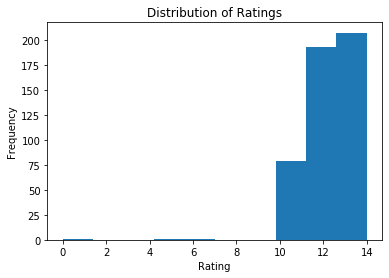

In [183]:
### distribution  of the ratings

tweet_api_clean.rating_numerator.plot(kind = "hist", bins = 10, title = "Distribution of Ratings").set_xlabel("Rating")

The rating distribution is heavily tilted to the left, with 75 percent of all ratings falling between 10 and 14, with 12 being the highest.

### The most rated dog breed

In [153]:
rate = tweet_api_clean.groupby("breed")["rating_numerator"].mean().to_frame().reset_index()

In [154]:
rate_10 = rate.sort_values(by = "rating_numerator", ascending = False).head(10)

Text(0.5, 0, 'Breed')

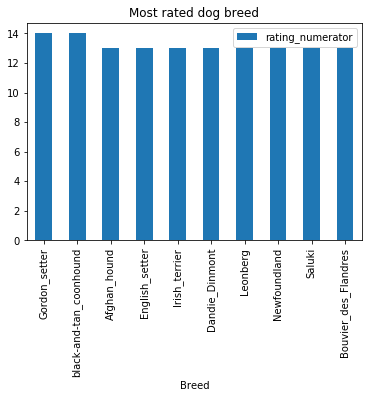

In [155]:
rate_10.plot(kind = "bar", x = "breed", y = "rating_numerator", title = "Most rated dog breed").set_xlabel("Breed")

The black and tan coonhound received the highest mean rating of 14.0, indicating that it was highly ranked among the breeds.

### The most rated dog stage

In [156]:
tweet_api_clean_notnone = tweet_api_clean[tweet_api_clean.dog_stage != "none"]

In [157]:
tweet_api_clean_notnone.dog_stage.value_counts()

doggo      37
pupper     28
puppo      16
floofer     3
none        0
Name: dog_stage, dtype: int64

In [158]:
name_rate = tweet_api_clean_notnone .groupby("dog_stage")["rating_numerator"].mean().to_frame().reset_index()

In [159]:
name_rate_10 = name_rate.sort_values(by = "rating_numerator", ascending = False).head(10)

Text(0.5, 0, 'Dog_stage')

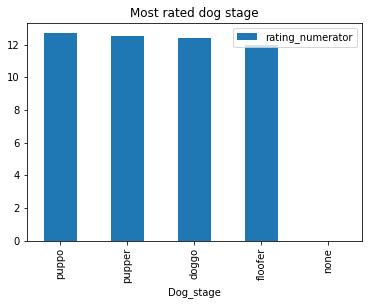

In [160]:
name_rate_10.plot(kind = "bar", x = "dog_stage", y = "rating_numerator", title = "Most rated dog stage").set_xlabel("Dog_stage")

Puppo had the highest mean rating of 12.04, indicating that it was the most highly ranked dogstage, which is closely followed by floofer and doggo

### Top 10 dog breeds by tweet_count

In [161]:
breed_exclusive = tweet_api_clean[tweet_api_clean.breed != "none"]

Text(0, 0.5, 'breed')

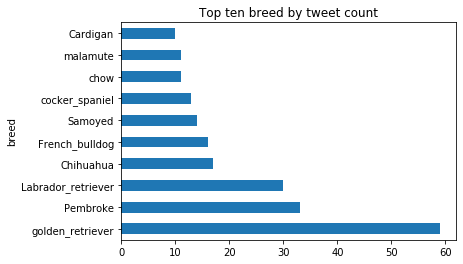

In [162]:
breed_exclusive.breed.value_counts().head(10).plot(kind = "barh", title = "Top ten breed by tweet count").set_ylabel("breed")

The Golden Retriever is the most popular dog, with about 125 tweets, as shown in the bar chart above. Second, third, and fourth position are Pembroke Spaniels, Labrador Retrievers, and Chihuahuas, respectively.

In [163]:
breed_like = breed_exclusive.groupby(['breed'])
top_10_like = breed_like.favorites.sum().sort_values(ascending = False).head(10)

Text(0, 0.5, 'breed')

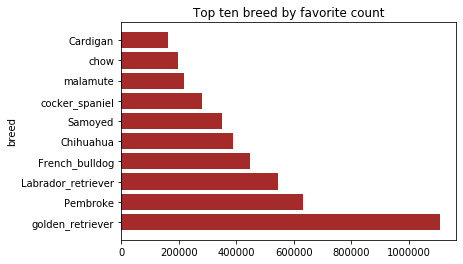

In [164]:
plt.barh(top_10_like.index, top_10_like, color = 'brown')
plt.title("Top ten breed by favorite count")
plt.ylabel("breed")

The chart above depicts the top ten dog breeds in terms of favourite counts. It matches the barplot of the top 10 dog breeds ordered by tweet from earlier, and the top four dog breeds are the same.

### Tweet with the most favourite_count

In [165]:
tweet_api_clean.sort_values(by = 'favorites', ascending = False).head(1)[["text", "date_time","favorites","retweets","dog_stage","breed", "rating_numerator"]]

,text,date_time,favorites,retweets,dog_stage,breed,rating_numerator
292,Here's a super supportive puppo participating ...,2017-01-21 18:26:02+00:00,124030,39892,puppo,Lakeland_terrier,13


### Tweet with the most retweet_count

In [166]:
tweet_api_clean.sort_values(by = 'retweets', ascending = False).head(1)[["text", "date_time","favorites","retweets","dog_stage","breed","rating_numerator"]]

,text,date_time,favorites,retweets,dog_stage,breed,rating_numerator
381,This is Stephan. He just wants to help. 13/10 ...,2016-12-09 06:17:20+00:00,111597,51621,none,Chihuahua,13


Here it shows that the most liked tweet, is also the most retweeted tweet, futhermore I'll check if there's a correlation between retweets and favourites

> ## Insight 2

### Correlation between Retweets and Favorites

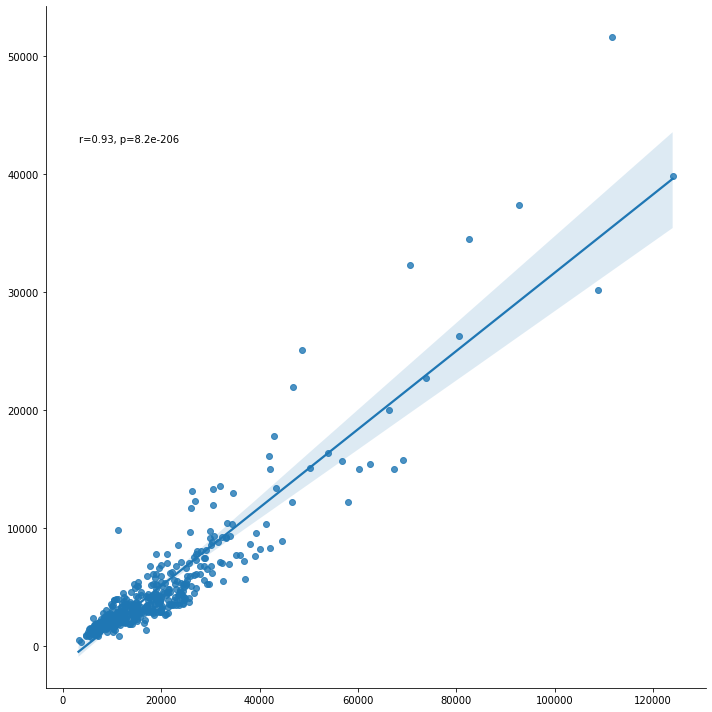

In [167]:
#https://stackoverflow.com/questions/25579227/seaborn-lmplot-with-equation-and-r2-text

import seaborn as sns
import scipy as sp

g = sns.lmplot(x='favorites', y='retweets', data=tweet_api_clean, height=10, aspect=1)

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['favorites'], data['retweets'])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
    
g.map_dataframe(annotate)
plt.show()

Retweet numbers and favorite counts have a strong positive correlation with a rsquared of 0.93. As the number of favorites increases, so does the number of retweets. Tweets with a high favorite count and a high retweet count receive higher ratings as well.

> ## Insight 3

### Because the golden retriever is the breed with the most retweets and likes, I'd like to dig more into it and observe how it changes through time.

In [169]:
golden_retriever = breed_exclusive[breed_exclusive.breed == "golden_retriever"]

In [170]:
golden_group_month = golden_retriever.groupby(["breed","month"])["breed"].count().to_frame()
golden_group_month = golden_group_month.droplevel(0).reset_index()
golden_group_month.rename(columns = {'breed':'value'}, inplace = True)
golden_group_month["breed"] = "golden_retriever"

Relationship with Date

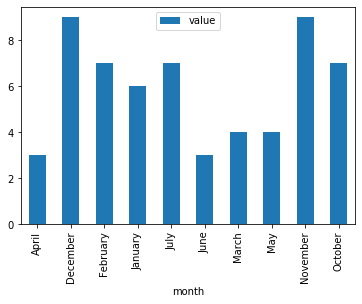

In [171]:
golden_group_month.plot.bar(x='month', y='value')

The number of golden retriever tweets fluctuated across the months, with the highest in December and November, and the lowest in April.

In [176]:
golden_group_day = golden_retriever.groupby(["breed","day"])["breed"].count().to_frame()
golden_group_day = golden_group_day.droplevel(0).reset_index()
golden_group_day.rename(columns = {'breed':'value'}, inplace = True)
golden_group_day["breed"] = "golden_retriever"

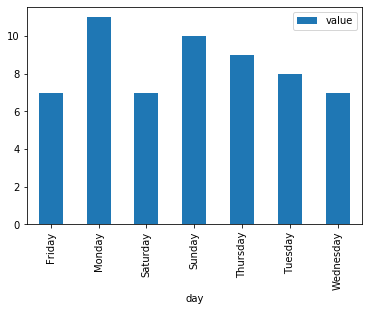

In [177]:
golden_group_day.plot.bar(x='day', y='value')

In [178]:
golden_group_year = golden_retriever.groupby(["breed","year"])["breed"].count().to_frame()
golden_group_year = golden_group_year.droplevel(0).reset_index()
golden_group_year.rename(columns = {'breed':'value'}, inplace = True)
golden_group_year["breed"] = "golden_retriever"

In [179]:
import squarify as sq

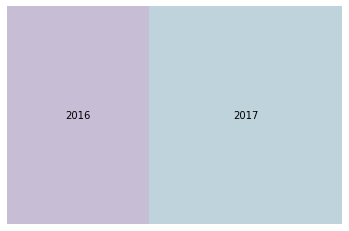

In [180]:
# https://www.python-graph-gallery.com/treemap/
sq.plot(sizes=golden_group_year['value'], label=golden_group_year['year'], alpha=.3 )
plt.axis('off')
plt.show()

The most tweets for golden retrievers were in 2017, and these tweets were often high in volume on Mondays and followed by Sundays, so if any paid advertising was to be done, Mondays and Sundays would be a suitable time.

In [181]:
golden_group_source = golden_retriever.groupby(["breed","source"])["breed"].count().to_frame()
golden_group_source = golden_group_source.droplevel(0).reset_index()
golden_group_source.rename(columns = {'breed':'value'}, inplace = True)
golden_group_source["breed"] = "golden_retriever"

([<matplotlib.patches.Wedge at 0x10d7708ecc8>],
 [Text(-1.1, 1.3471114790620887e-16, 'Twitter for iPhone')])

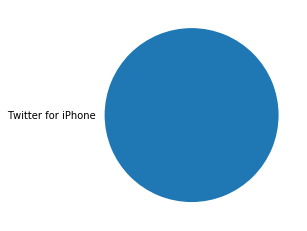

In [182]:
plt.pie(golden_group_source.value, labels = golden_group_source.source)

We can observe that the majority of tweets on golden retrievers are sent from an iPhone.


## Step 6: Reporting

I have attached appropriate documentation for the data wrangling steps: gather, assess, and clean in a "wrangle_report.html" file and documentation of analysis and insights into final data in a "act_report.html" file.